# Problem klasyfikacji binarnej na przykładzie danych batchowych

In [1]:
%pip install tweepy
import tweepy

# your bearer token
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAAGrcgEAAAAAZtB52qT%2F9wwlHjjnh1O20JLqqwo%3DpP6id6DjjZDU3kM6YPo513aAtQzo9ymFexWUxfBcxRfprbVAqE"
# create your client 
client = tweepy.Client(bearer_token=MY_BEARER_TOKEN)

Note: you may need to restart the kernel to use updated packages.


In [2]:
query = '"Love is" lang:en -is:retweet -has:images -has:media -has:mentions -has:links -has:hashtags'
tweets_0 = tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=5000)

# import the pandas library
import pandas as pd

# create a list of records
tweet_info_ls_0 = []

for tweet in tweets_0:
    tweet_info = (
        tweet.text
    )
    if len(tweet_info)<25:
        tweet_info_ls_0.append(tweet_info)

# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls_0)
# display the dataframe
tweets_df

,0
0,Love is weird…
1,Love is….
2,love is not FREE.
3,Love is weird
4,Love is... weird
...,...
278,love is a sweet pain
279,Love is weird .
280,Love is respect.
281,love is weird …


In [3]:
for a in tweets_df:
    tweet_info_ls = tweets_df[0].values.tolist()
tweet_info_ls

['Love is weird…',
 'Love is….',
 'love is not FREE.',
 'Love is  weird',
 'Love is... weird',
 'I no love is war',
 'Love is weird',
 'Love is love',
 'maybe love is overated',
 'love is …. AHHH 🥲',
 'love is pain',
 'Love is a trial',
 'love is scary.',
 'ballad: love is around',
 'pure love is real',
 'Love is…',
 '"Love Is Torture" ...',
 'You love is like',
 'love is not enough',
 'My@love is sick no :(',
 'THIS LOVE IS TAINTED',
 'Love is real :]',
 'Toosii x love is',
 'Love is weird \U0001fae5',
 'Self love is important ♡',
 'Toosii love is…\U0001f979',
 'Love is Weird \U0001f979',
 'love is my only muse',
 'Love Is…',
 'Love is complicated',
 'Love is…',
 'love is trust',
 'love is so funny',
 'Love is caring ….',
 'Love is friction',
 'Love is waste of time 👎',
 'Love is powerful 🧡',
 'All my love is gone',
 '§ Love is weird §',
 'Love is sweet sha 😅',
 'Love is a caryrw',
 'Love is crazy🤣🤣🤣🤣🤣🤣',
 'my love is always.',
 'love is painful 💔',
 'Love is weird',
 'Love is weird',

## 1. Obróbka danych

### 1.1. Usuwanie emotikon

In [4]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

new_lst = []
for i in tweet_info_ls:
    i=remove_emoji(i)
    new_lst.append(i)

tweets_df = pd.DataFrame(new_lst)
tweets_df

,0
0,Love is weird…
1,Love is….
2,love is not FREE.
3,Love is weird
4,Love is... weird
...,...
278,love is a sweet pain
279,Love is weird .
280,Love is respect.
281,love is weird …


### 1.2. Usuwanie linków oraz ujednolicenie pisowni

In [5]:
pattern=r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))';
test=[]
for a in new_lst:
    a = re.sub(pattern,"", a)
    a=a.lower()
    test.append(a)

tweeties_df = pd.DataFrame(test)
tweeties_df

,0
0,love is weird…
1,love is….
2,love is not free.
3,love is weird
4,love is... weird
...,...
278,love is a sweet pain
279,love is weird .
280,love is respect.
281,love is weird …


### 1.3. Rozwinięcie skrótów

In [6]:
%pip install contractions
import contractions
expanded=[]
for word in test:
    #expanding contractions
    expanded.append(contractions.fix(word))

expanded_text = ' '.join(expanded)
expanded_df = pd.DataFrame(expanded)

Note: you may need to restart the kernel to use updated packages.


### 1.4. Usuwanie znaków specjalnych

In [7]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","$","\n", "—", "..."]
for char in spec_chars:
    expanded_df[0] = expanded_df[0].str.replace(char, ' ', regex=False)

expanded_df

,0
0,love is weird…
1,love is…
2,love is not free
3,love is weird
4,love is weird
...,...
278,love is a sweet pain
279,love is weird
280,love is respect
281,love is weird …


### 1.5. Usuwanie pojedynczych znaków, znaków interpunkcyjnych, liczb, złożeń słowno-liczbowych

In [8]:
sentences_list=[]

for a in tweeties_df:
    sentences_list = expanded_df[0].values.tolist()

numbers = r'[0-9]'
sentences_without_numbers=[]
for a in sentences_list:
    a = re.sub(numbers,"", a)
    sentences_without_numbers.append(a)

%pip install nltk
import pickle as pk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

no_sing_char_list=[]
for sentence in sentences_without_numbers:
    sentence = remove_single_char_func(sentence, threshold=1)
    no_sing_char_list.append(sentence)

no_sing_char_list

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['love is weird…',
 'love is…',
 'love is not free',
 'love is weird',
 'love is weird',
 'no love is war',
 'love is weird',
 'love is love',
 'maybe love is overated',
 'love is ahhh',
 'love is pain',
 'love is trial',
 'love is scary',
 'ballad love is around',
 'pure love is real',
 'love is…',
 'love is torture',
 'you love is like',
 'love is not enough',
 'my love is sick no',
 'this love is tainted',
 'love is real',
 'toosii love is',
 'love is weird',
 'self love is important',
 'toosii love is…',
 'love is weird',
 'love is my only muse',
 'love is…',
 'love is complicated',
 'love is…',
 'love is trust',
 'love is so funny',
 'love is caring',
 'love is friction',
 'love is waste of time',
 'love is powerful',
 'all my love is gone',
 'love is weird',
 'love is sweet sha',
 'love is caryrw',
 'love is crazy',
 'my love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'love is',
 'but love is all we have',
 'one sided love is enough',
 'love is trust',
 

### 1.6. Zamiana wielokrotnej spacji na pojedynczą spację

In [9]:
single_char=[]
for a in no_sing_char_list:
    a = re.sub(r'\s+', ' ', a, flags=re.I)
    a = re.sub('…',' ', a, flags=re.I)
    a = re.sub('\.+',' ', a, flags=re.I)
    single_char.append(a)

print(single_char)


['love is weird ', 'love is ', 'love is not free', 'love is weird', 'love is weird', 'no love is war', 'love is weird', 'love is love', 'maybe love is overated', 'love is ahhh', 'love is pain', 'love is trial', 'love is scary', 'ballad love is around', 'pure love is real', 'love is ', 'love is torture', 'you love is like', 'love is not enough', 'my love is sick no', 'this love is tainted', 'love is real', 'toosii love is', 'love is weird', 'self love is important', 'toosii love is ', 'love is weird', 'love is my only muse', 'love is ', 'love is complicated', 'love is ', 'love is trust', 'love is so funny', 'love is caring', 'love is friction', 'love is waste of time', 'love is powerful', 'all my love is gone', 'love is weird', 'love is sweet sha', 'love is caryrw', 'love is crazy', 'my love is always', 'love is painful', 'love is weird', 'love is weird', 'love is', 'but love is all we have', 'one sided love is enough', 'love is trust', 'love is love', 'our love is god', 'love is the pr

### 1.7. Usuwanie "stop-words"

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
sw_nltk.remove('is')
sw_nltk.append('like')
sw_nltk.append('without')
sw_nltk.append('though')
sw_nltk.append('yeah')
sw_nltk.append('sha')
sw_nltk.append('self')

stop_words_removed=[]

for sentence in single_char:
    words = word_tokenize(sentence)
    new_sentence = ' '.join([word for word in words if word not in sw_nltk])
    stop_words_removed.append(new_sentence)

stop_words_removed

['love is weird',
 'love is',
 'love is free',
 'love is weird',
 'love is weird',
 'love is war',
 'love is weird',
 'love is love',
 'maybe love is overated',
 'love is ahhh',
 'love is pain',
 'love is trial',
 'love is scary',
 'ballad love is around',
 'pure love is real',
 'love is',
 'love is torture',
 'love is',
 'love is enough',
 'love is sick',
 'love is tainted',
 'love is real',
 'toosii love is',
 'love is weird',
 'love is important',
 'toosii love is',
 'love is weird',
 'love is muse',
 'love is',
 'love is complicated',
 'love is',
 'love is trust',
 'love is funny',
 'love is caring',
 'love is friction',
 'love is waste time',
 'love is powerful',
 'love is gone',
 'love is weird',
 'love is sweet',
 'love is caryrw',
 'love is crazy',
 'love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'love is',
 'love is',
 'one sided love is enough',
 'love is trust',
 'love is love',
 'love is god',
 'love is practice',
 'love is crack',
 'love is caryr

### 1.8. Usuwanie nieanglojęzycznych słów

In [12]:
nltk.download('words')
Eng_words = set(nltk.corpus.words.words())

def Eng_rule(sentence):
    #Eng_list=[]
    token_words=word_tokenize(sentence)
    token_words
    Eng_list=[]
    for word in token_words:
        if word in Eng_words:
            Eng_list.append(word)
        else:
            Eng_list.append("")
    return " ".join(Eng_list)

English_list=[]

for i in stop_words_removed:
    English_sentence=Eng_rule(i)
    English_list.append(English_sentence)
    
English_list

[nltk_data] Downloading package words to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package words is already up-to-date!


['love is weird',
 'love is',
 'love is free',
 'love is weird',
 'love is weird',
 'love is war',
 'love is weird',
 'love is love',
 'maybe love is ',
 'love is ',
 'love is pain',
 'love is trial',
 'love is scary',
 'ballad love is around',
 'pure love is real',
 'love is',
 'love is torture',
 'love is',
 'love is enough',
 'love is sick',
 'love is ',
 'love is real',
 ' love is',
 'love is weird',
 'love is important',
 ' love is',
 'love is weird',
 'love is muse',
 'love is',
 'love is complicated',
 'love is',
 'love is trust',
 'love is funny',
 'love is ',
 'love is friction',
 'love is waste time',
 'love is powerful',
 'love is gone',
 'love is weird',
 'love is sweet',
 'love is ',
 'love is crazy',
 'love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'love is',
 'love is',
 'one sided love is enough',
 'love is trust',
 'love is love',
 'love is god',
 'love is practice',
 'love is crack',
 'love is ',
 'love is',
 ' love is poison',
 ' love is',


### 1.9. Stemming i lemmatyzacja

In [13]:
%pip install nltk

from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')

from nltk.tokenize import sent_tokenize, word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(snowball.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

stemmed_list=[]

for i in English_list:
    stem_sentence=stemSentence(i)
    stemmed_list.append(stem_sentence)
    
stemmed_list

Note: you may need to restart the kernel to use updated packages.


['love is weird ',
 'love is ',
 'love is free ',
 'love is weird ',
 'love is weird ',
 'love is war ',
 'love is weird ',
 'love is love ',
 'mayb love is ',
 'love is ',
 'love is pain ',
 'love is trial ',
 'love is scari ',
 'ballad love is around ',
 'pure love is real ',
 'love is ',
 'love is tortur ',
 'love is ',
 'love is enough ',
 'love is sick ',
 'love is ',
 'love is real ',
 'love is ',
 'love is weird ',
 'love is import ',
 'love is ',
 'love is weird ',
 'love is muse ',
 'love is ',
 'love is complic ',
 'love is ',
 'love is trust ',
 'love is funni ',
 'love is ',
 'love is friction ',
 'love is wast time ',
 'love is power ',
 'love is gone ',
 'love is weird ',
 'love is sweet ',
 'love is ',
 'love is crazi ',
 'love is alway ',
 'love is pain ',
 'love is weird ',
 'love is weird ',
 'love is ',
 'love is ',
 'one side love is enough ',
 'love is trust ',
 'love is love ',
 'love is god ',
 'love is practic ',
 'love is crack ',
 'love is ',
 'love is ',
 'lo

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmat(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

lemmat_list=[]

for i in English_list:
    lem_sentence=Lemmat(i)
    lemmat_list.append(lem_sentence)

lemmat_list

['love be weird ',
 'love be ',
 'love be free ',
 'love be weird ',
 'love be weird ',
 'love be war ',
 'love be weird ',
 'love be love ',
 'maybe love be ',
 'love be ',
 'love be pain ',
 'love be trial ',
 'love be scary ',
 'ballad love be around ',
 'pure love be real ',
 'love be ',
 'love be torture ',
 'love be ',
 'love be enough ',
 'love be sick ',
 'love be ',
 'love be real ',
 'love be ',
 'love be weird ',
 'love be important ',
 'love be ',
 'love be weird ',
 'love be muse ',
 'love be ',
 'love be complicate ',
 'love be ',
 'love be trust ',
 'love be funny ',
 'love be ',
 'love be friction ',
 'love be waste time ',
 'love be powerful ',
 'love be go ',
 'love be weird ',
 'love be sweet ',
 'love be ',
 'love be crazy ',
 'love be always ',
 'love be painful ',
 'love be weird ',
 'love be weird ',
 'love be ',
 'love be ',
 'one side love be enough ',
 'love be trust ',
 'love be love ',
 'love be god ',
 'love be practice ',
 'love be crack ',
 'love be ',
 '

### 1.10. Usuwanie zduplikowanych słów

In [49]:
#deleting duplicates
unduplicated_list=[]
for s in English_list:
    unduplicated_list.append(' '.join(dict.fromkeys(s.split())))

unduplicated_list

['love is weird',
 'love is',
 'love is free',
 'love is weird',
 'love is weird',
 'love is war',
 'love is weird',
 'love is',
 'maybe love is',
 'love is',
 'love is pain',
 'love is trial',
 'love is scary',
 'ballad love is around',
 'pure love is real',
 'love is',
 'love is torture',
 'love is',
 'love is enough',
 'love is sick',
 'love is',
 'love is real',
 'love is',
 'love is weird',
 'love is important',
 'love is',
 'love is weird',
 'love is muse',
 'love is',
 'love is complicated',
 'love is',
 'love is trust',
 'love is funny',
 'love is',
 'love is friction',
 'love is waste time',
 'love is powerful',
 'love is gone',
 'love is weird',
 'love is sweet',
 'love is',
 'love is crazy',
 'love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'love is',
 'love is',
 'one sided love is enough',
 'love is trust',
 'love is',
 'love is god',
 'love is practice',
 'love is crack',
 'love is',
 'love is',
 'love is poison',
 'love is',
 'love is',
 'love i

### 1.11. Usuwanie braków danych

In [50]:
import numpy as np
unduplicated_list = pd.DataFrame(unduplicated_list)
unduplicated_list[0].replace('', np.nan, inplace=True)
unduplicated_list.dropna(inplace=True)
unduplicated_list

,0
0,love is weird
1,love is
2,love is free
3,love is weird
4,love is weird
...,...
278,love is sweet pain
279,love is weird
280,love is respect
281,love is weird


In [51]:
love_list=[]
for i in unduplicated_list[0]:
    if "love" in i:
        love_list.append(i)

love_list

['love is weird',
 'love is',
 'love is free',
 'love is weird',
 'love is weird',
 'love is war',
 'love is weird',
 'love is',
 'maybe love is',
 'love is',
 'love is pain',
 'love is trial',
 'love is scary',
 'ballad love is around',
 'pure love is real',
 'love is',
 'love is torture',
 'love is',
 'love is enough',
 'love is sick',
 'love is',
 'love is real',
 'love is',
 'love is weird',
 'love is important',
 'love is',
 'love is weird',
 'love is muse',
 'love is',
 'love is complicated',
 'love is',
 'love is trust',
 'love is funny',
 'love is',
 'love is friction',
 'love is waste time',
 'love is powerful',
 'love is gone',
 'love is weird',
 'love is sweet',
 'love is',
 'love is crazy',
 'love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'love is',
 'love is',
 'one sided love is enough',
 'love is trust',
 'love is',
 'love is god',
 'love is practice',
 'love is crack',
 'love is',
 'love is',
 'love is poison',
 'love is',
 'love is',
 'love i

### 1.12. Usuwanie niedokończonych zdań

In [52]:
love_is_list=[]
for i in love_list:
    words = i.split()
    if "is" not in words[-1]:
        love_is_list.append(" ".join(words))

love_is_list

['love is weird',
 'love is free',
 'love is weird',
 'love is weird',
 'love is war',
 'love is weird',
 'love is pain',
 'love is trial',
 'love is scary',
 'ballad love is around',
 'pure love is real',
 'love is torture',
 'love is enough',
 'love is sick',
 'love is real',
 'love is weird',
 'love is important',
 'love is weird',
 'love is muse',
 'love is complicated',
 'love is trust',
 'love is funny',
 'love is friction',
 'love is waste time',
 'love is powerful',
 'love is gone',
 'love is weird',
 'love is sweet',
 'love is crazy',
 'love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'one sided love is enough',
 'love is trust',
 'love is god',
 'love is practice',
 'love is crack',
 'love is feeling',
 'love is trust guilt',
 'love is weird',
 'love is real',
 'love is long',
 'love is wicked',
 'love is gone',
 'love is remedy',
 'love is sweet',
 'love is cowboy',
 'love is poetry',
 'eve love is blind',
 'love is strong death',
 'love is complicat

In [53]:
love_is_sentences_list=[]
for i in love_is_list:
    words = i.split()
    if len(words) < 4 and len(words) > 2:
        love_is_sentences_list.append(" ".join(words))

love_is_sentences_list

['love is weird',
 'love is free',
 'love is weird',
 'love is weird',
 'love is war',
 'love is weird',
 'love is pain',
 'love is trial',
 'love is scary',
 'love is torture',
 'love is enough',
 'love is sick',
 'love is real',
 'love is weird',
 'love is important',
 'love is weird',
 'love is muse',
 'love is complicated',
 'love is trust',
 'love is funny',
 'love is friction',
 'love is powerful',
 'love is gone',
 'love is weird',
 'love is sweet',
 'love is crazy',
 'love is always',
 'love is painful',
 'love is weird',
 'love is weird',
 'love is trust',
 'love is god',
 'love is practice',
 'love is crack',
 'love is feeling',
 'love is weird',
 'love is real',
 'love is long',
 'love is wicked',
 'love is gone',
 'love is remedy',
 'love is sweet',
 'love is cowboy',
 'love is poetry',
 'love is complicated',
 'love is blind',
 'love is strong',
 'love is happiness',
 'love is trust',
 'love is beautiful',
 'love is magical',
 'love is weird',
 'love is god',
 'love is far

### 1.13. Dane po obróbce

In [54]:
processed_tweets_1 = pd.DataFrame(love_is_sentences_list)


## 2. Automatyczne etykietowanie

In [55]:
from transformers import pipeline

# Output labels
candidate_labels = ["Love Positive", "Love Negative"]

# device=0 for GPU usage
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

results_labelled=[]

for i in range(len(processed_tweets_1)):
  
    #multi_label=True will return confidence score for both labels independently 
    model_dict = classifier(processed_tweets_1[0].iloc[i], candidate_labels)

    #Zip results to dict
    result_dict = dict(zip(model_dict.get('labels'), model_dict.get('scores')))
    results_labelled.append(model_dict)

results_labelled

[{'sequence': 'love is weird',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is free',
  'labels': ['Love Positive', 'Love Negative'],
  'scores': [0.9752225875854492, 0.024777410551905632]},
 {'sequence': 'love is weird',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is weird',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is war',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.9901207089424133, 0.009879264049232006]},
 {'sequence': 'love is weird',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is pain',
  'labels': ['Love Negative', 'Love Positive'],
  'scores': [0.9934229850769043, 0.006576949264854193]},
 {'sequence': 'love is trial',
  'labels': ['Love Negati

In [56]:
for i in results_labelled:
    if i["labels"][0] == "Love Positive":
        i["labels"].remove("Love Negative")
    if i["labels"][0] == "Love Negative":
        i["labels"].remove("Love Positive")
results_labelled

[{'sequence': 'love is weird',
  'labels': ['Love Negative'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is free',
  'labels': ['Love Positive'],
  'scores': [0.9752225875854492, 0.024777410551905632]},
 {'sequence': 'love is weird',
  'labels': ['Love Negative'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is weird',
  'labels': ['Love Negative'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is war',
  'labels': ['Love Negative'],
  'scores': [0.9901207089424133, 0.009879264049232006]},
 {'sequence': 'love is weird',
  'labels': ['Love Negative'],
  'scores': [0.7792720198631287, 0.22072798013687134]},
 {'sequence': 'love is pain',
  'labels': ['Love Negative'],
  'scores': [0.9934229850769043, 0.006576949264854193]},
 {'sequence': 'love is trial',
  'labels': ['Love Negative'],
  'scores': [0.8244001269340515, 0.1755998432636261]},
 {'sequence': 'love is scary',
  'labels': ['Love Negative

In [57]:
df_labelled=pd.DataFrame.from_dict(results_labelled) 
df_labelled_labels=[]

for i in df_labelled["labels"]:
    df_labelled_labels.append(i[0])
    
df_labelled["Labels"] = df_labelled_labels
df_labelled=df_labelled.drop(columns=['labels', 'scores'])

In [58]:
df_labelled_love_positive=df_labelled[df_labelled['Labels'] == "Love Positive"]
df_labelled_love_positive.insert(0,"category",0)

df_labelled_love_negative=df_labelled[df_labelled['Labels'] == "Love Negative"]
df_labelled_love_negative.insert(0,"category",1)

In [59]:
frames = [df_labelled_love_positive, df_labelled_love_negative]

combined_frame = pd.concat(frames)
combined_frame=combined_frame.drop(columns=["Labels"])
combined_frame

,category,sequence
1,0,love is free
10,0,love is enough
12,0,love is real
14,0,love is important
16,0,love is muse
...,...,...
159,1,love is weird
161,1,love is lie
165,1,love is war
167,1,love is weird


In [60]:
%pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

sentences = combined_frame["sequence"].values
labels = combined_frame["category"].values
sentences_train, sentences_val, labels_train, labels_val = train_test_split(sentences, labels, test_size=0.5, random_state=150)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [61]:
train_dataset = pd.DataFrame(labels_train)
train_dataset["sentences"]=sentences_train

val_dataset = pd.DataFrame(labels_val)
val_dataset["sentences"]=sentences_val

sentences_1 = val_dataset["sentences"].values
labels_1 = val_dataset[0].values
sentences_val_1, sentences_test_1, labels_val_1, labels_test_1 = train_test_split(sentences_1, labels_1, test_size=0.4, random_state=150)

test_dataset = pd.DataFrame(labels_test_1)
test_dataset["sentences"]=sentences_test_1

In [62]:
np.savetxt('Twitter_Train_Dataset_4.txt', train_dataset.values, fmt = "%s")
np.savetxt('Twitter_Val_Dataset_4.txt', val_dataset.values, fmt = "%s")
np.savetxt('Twitter_Test_Dataset_4.txt', test_dataset.values, fmt = "%s")

## 3. Klasyfikacja binarna na przykładzie Bag of Words

In [29]:
%pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.25, random_state=100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences)
X_train = vectorizer.transform(train_sentences)
X_test  = vectorizer.transform(test_sentences)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, train_labels)
score_train = classifier.score(X_train, train_labels)
print("Train Accuracy:", score_train)
score_test = classifier.score(X_test, test_labels)
print("Test Accuracy:", score_test)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
Train Accuracy: 0.8914728682170543
Test Accuracy: 0.7045454545454546


## 4. Klasyfikacja binarna na przykładzie klasycznego modelu graficznego DisCoCat

In [63]:
%pip install lambeq
%pip install lambeq[depccg]
%pip install jax
%pip install jaxlib
%pip install pytket-qiskit
%pip install noisyopt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` befor

In [64]:
from discopy.tensor import Tensor
from jax import numpy as np
import numpy

np.random = numpy.random
Tensor.np = np

In [65]:
# Read data
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = float(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences

import pandas as pd
train_labels, train_data = read_data('Twitter_Train_Dataset_4.txt')
val_labels, val_data = read_data('Twitter_Val_Dataset_4.txt')
test_labels, test_data = read_data('Twitter_Test_Dataset_4.txt')

In [78]:
len(train_data)

85

### 4.1. Tworzenie diagramów

In [66]:
from lambeq import BobcatParser
parser_1 = BobcatParser(verbose='text')
train_diagrams = parser_1.sentences2diagrams(train_data)
val_diagrams = parser_1.sentences2diagrams(val_data)
test_diagrams = parser_1.sentences2diagrams(test_data)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


### 4.2. Tworzenie ansatzów

In [67]:
train_diagrams[:1]

[Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('love', Ty('n')), Word('is', Ty(Ob('n', z=1), 's', Ob('s', z=-1), 'n')), Word('hetero', Ty(Ob('n', z=1), 's')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('s', z=-1)), Ty('s')), Cup(Ty('n'), Ty(Ob('n', z=1)))], offsets=[0, 1, 5, 4, 3, 0])]

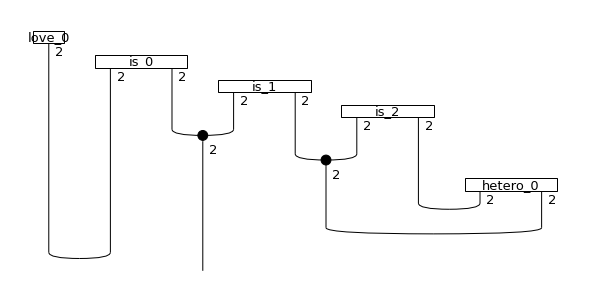

[Diagram(dom=Dim(1), cod=Dim(2), boxes=[tensor.Box('love_0', Dim(1), Dim(2), data=love_0__n), tensor.Box('is_0', Dim(1), Dim(2, 2), data=is_0__n.r@s), tensor.Box('is_1', Dim(1), Dim(2, 2), data=is_1__s@s.l), tensor.Box('is_2', Dim(1), Dim(2, 2), data=is_2__s.l@n), Spider(2, 1, Dim(2)), Spider(2, 1, Dim(2)), tensor.Box('hetero_0', Dim(1), Dim(2, 2), data=hetero_0__n.r@s), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2))], offsets=[0, 1, 3, 5, 2, 3, 5, 4, 3, 0]),
 Diagram(dom=Dim(1), cod=Dim(2), boxes=[tensor.Box('love_0', Dim(1), Dim(2), data=love_0__n), tensor.Box('is_0', Dim(1), Dim(2, 2), data=is_0__n.r@s), tensor.Box('is_1', Dim(1), Dim(2, 2), data=is_1__s@s.l), tensor.Box('is_2', Dim(1), Dim(2, 2), data=is_2__s.l@n), Spider(2, 1, Dim(2)), Spider(2, 1, Dim(2)), tensor.Box('weird_0', Dim(1), Dim(2, 2), data=weird_0__n.r@s), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2)), Spider(2, 0, Dim(2))], offsets=[0, 1, 3, 5, 2, 3, 5, 4, 3, 0]),
 Diagram(dom=Dim(1), cod=Dim(2), boxes

In [68]:
# Create an ansatz by assigning 2 dimensions to both
# noun and sentence spaces
from lambeq import AtomicType, SpiderAnsatz
from discopy import Dim

N = AtomicType.NOUN
S = AtomicType.SENTENCE

tensor_ansatz = SpiderAnsatz({N: Dim(2), S: Dim(2)})
train_circuits = [tensor_ansatz(d) for d in train_diagrams]
val_circuits = [tensor_ansatz(d) for d in val_diagrams]
test_circuits = [tensor_ansatz(d) for d in test_diagrams]
all_circuits = train_circuits + val_circuits + test_circuits

all_circuits[0].draw(figsize=(8,4), fontsize=13)
all_circuits

### 4.3. Zdefiniowanie modelu

In [69]:
from lambeq import PytorchModel

model = PytorchModel.from_diagrams(all_circuits)

In [70]:
import torch
BATCH_SIZE = 30
EPOCHS = 20
LEARNING_RATE = 3e-2
SEED = 0
sig = torch.sigmoid

def accuracy(y_hat, y):
    return torch.sum(torch.eq(torch.round(sig(y_hat)), y))/len(y)/2  # half due to double-counting

eval_metrics = {"acc": accuracy}

### 4.3 Zdefiniowanie algorytmu treningowego

In [71]:
from lambeq import PytorchTrainer

trainer = PytorchTrainer(
        model=model,
        loss_function=torch.nn.BCEWithLogitsLoss(),
        optimizer=torch.optim.AdamW,
        learning_rate=LEARNING_RATE,
        epochs=EPOCHS,
        evaluate_functions=eval_metrics,
        evaluate_on_train=True,
        verbose='text',
        seed=SEED)

### 4.4. Zdefiniowanie danych treningowych, walidacyjnych i testowych

In [81]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels)

val_dataset = Dataset(val_circuits, val_labels, shuffle=False)

In [76]:
len(val_targets)

87

In [82]:
trainer.fit(train_dataset, val_dataset, evaluation_step=1, logging_step=5)

Epoch 1:   train/loss: 0.6903   valid/loss: 0.6863   train/acc: 0.5000   valid/acc: 0.5000
Epoch 5:   train/loss: 0.6743   valid/loss: 0.6692   train/acc: 0.5000   valid/acc: 0.5000
Epoch 10:  train/loss: 0.6195   valid/loss: 0.6237   train/acc: 0.4824   valid/acc: 0.4824
Epoch 15:  train/loss: 0.5164   valid/loss: 0.5663   train/acc: 0.4824   valid/acc: 0.5294
Epoch 20:  train/loss: 0.3582   valid/loss: 0.4966   train/acc: 0.8706   valid/acc: 0.8000

Training completed!


### 4.5. Wyniki

Test accuracy: 0.8382353186607361


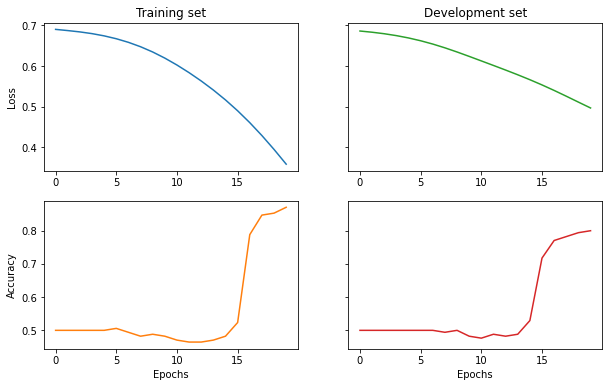

In [83]:
import matplotlib.pyplot as plt

fig1, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharey='row', figsize=(10, 6))

ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Epochs')
ax_br.set_xlabel('Epochs')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))

# print test accuracy
test_acc = accuracy(model(test_circuits), torch.tensor(test_labels))
print('Test accuracy:', test_acc.item())

## 5. Klasyfikacja binarna na przykładzie kwantowego modelu graficznego DisCoCat

In [27]:
import os
import numpy as np
os.environ["TOKENIZERS_PARALLELISM"] = "false"

BATCH_SIZE = 30
EPOCHS = 20
SEED = 0

def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences

train_labels, train_data = read_data('Twitter_Train_Dataset_4.txt')
val_labels, val_data = read_data('Twitter_Val_Dataset_4.txt')
test_labels, test_data = read_data('Twitter_Test_Dataset_4.txt')

In [28]:
from lambeq import BobcatParser

parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(val_data, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(test_data, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


In [29]:
train_diagrams = [
    diagram.normal_form()
    for diagram in raw_train_diagrams if diagram is not None
]
val_diagrams = [
    diagram.normal_form()
    for diagram in raw_val_diagrams if diagram is not None
]
test_diagrams = [
    diagram.normal_form()
    for diagram in raw_test_diagrams if diagram is not None
]

train_labels = [
    label for (diagram, label)
    in zip(raw_train_diagrams, train_labels)
    if diagram is not None]
val_labels = [
    label for (diagram, label)
    in zip(raw_val_diagrams, val_labels)
    if diagram is not None
]
test_labels = [
    label for (diagram, label)
    in zip(raw_test_diagrams, test_labels)
    if diagram is not None
]

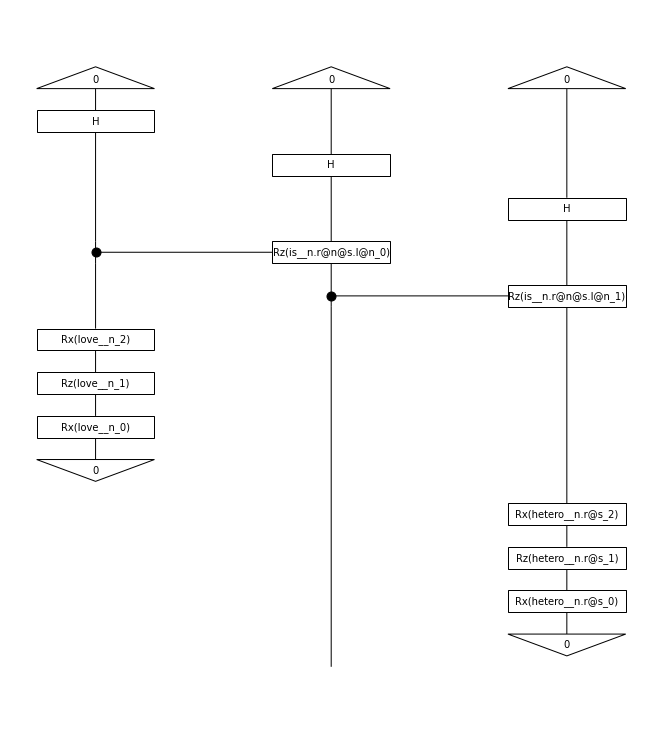

In [30]:
from lambeq import AtomicType, IQPAnsatz, remove_cups

ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 0},
                   n_layers=1, n_single_qubit_params=3)

train_circuits = [ansatz(remove_cups(diagram)) for diagram in train_diagrams]
val_circuits =  [ansatz(remove_cups(diagram))  for diagram in val_diagrams]
test_circuits =  [ansatz(remove_cups(diagram))  for diagram in test_diagrams]

train_circuits[0].draw(figsize=(9, 10))

In [31]:
from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

all_circuits = train_circuits + val_circuits

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

In [32]:
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat)) / len(y)  # binary cross-entropy loss

acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": acc}

In [33]:
from lambeq import QuantumTrainer, SPSAOptimizer

trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.01*EPOCHS},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

In [34]:
from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=BATCH_SIZE)

val_dataset = Dataset(val_circuits, val_labels, shuffle=False)

In [35]:
trainer.fit(train_dataset, val_dataset, evaluation_step=1, logging_step=5)

Epoch 1:   train/loss: 1.0536   valid/loss: 0.9261   train/acc: 0.3294   valid/acc: 0.4882
Epoch 5:   train/loss: 0.6435   valid/loss: 0.7710   train/acc: 0.6588   valid/acc: 0.6706
Epoch 10:  train/loss: 0.6471   valid/loss: 0.7689   train/acc: 0.6588   valid/acc: 0.6529
Epoch 15:  train/loss: 0.6626   valid/loss: 0.5616   train/acc: 0.7176   valid/acc: 0.7294
Epoch 20:  train/loss: 0.5524   valid/loss: 0.5359   train/acc: 0.7176   valid/acc: 0.7412

Training completed!


Test accuracy: 0.6764705882352942


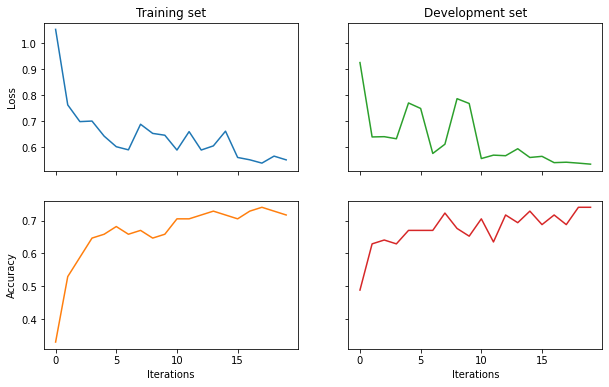

In [36]:
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs[::1], color=next(colours))
ax_bl.plot(trainer.train_results['acc'][::1], color=next(colours))
ax_tr.plot(trainer.val_costs[::1], color=next(colours))
ax_br.plot(trainer.val_results['acc'][::1], color=next(colours))

# print test accuracy
test_acc = acc(model(test_circuits), test_labels)
print('Test accuracy:', test_acc.item())